# Exercise 1.1

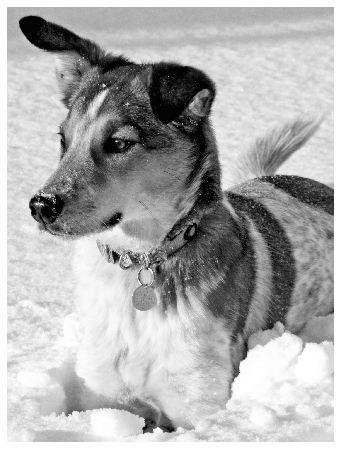

In [85]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('.','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [86]:
#Full SVD
U, S, VT = np.linalg.svd(X, full_matrices=True)

In [87]:
U.shape

(2000, 2000)

In [88]:
corrU = U.transpose()[0:100, :] @ U[:, 0:100]

In [89]:
print(corrU.shape)
corrU #the result is identity, diagonals are 1, everthing else is 0, less than order 10^-16

(100, 100)


array([[ 1.00000000e+00,  1.82796486e-16,  1.04083409e-16, ...,
         1.73472348e-17, -8.67361738e-18, -1.08420217e-17],
       [ 1.82796486e-16,  1.00000000e+00,  2.29417180e-16, ...,
         1.84314369e-17,  4.31512465e-17,  1.86482774e-17],
       [ 1.04083409e-16,  2.29417180e-16,  1.00000000e+00, ...,
        -7.15573434e-18, -2.86229374e-17,  2.86229374e-17],
       ...,
       [ 1.73472348e-17,  1.84314369e-17, -7.15573434e-18, ...,
         1.00000000e+00, -6.26885696e-16,  3.96384314e-16],
       [-8.67361738e-18,  4.31512465e-17, -2.86229374e-17, ...,
        -6.26885696e-16,  1.00000000e+00,  2.49800181e-16],
       [-1.08420217e-17,  1.86482774e-17,  2.86229374e-17, ...,
         3.96384314e-16,  2.49800181e-16,  1.00000000e+00]])

In [90]:
np.linalg.norm(corrU - np.eye(100), 'fro')

1.6320741723735663e-14

In [91]:
corrU =  U[:, 0:100] @ U.transpose()[0:100, :]

In [92]:
np.linalg.norm(corrU - np.eye(2000), 'fro') #non-zero norm, clearly not Identity

43.588989435406745

In [105]:
err = []
r_val = []
for r in range(1, 2000, 5):
    corrU =  U[:, 0:r] @ U.transpose()[0:r, :]
    err.append(np.linalg.norm(corrU - np.eye(2000), 'fro'))
    r_val.append(r)


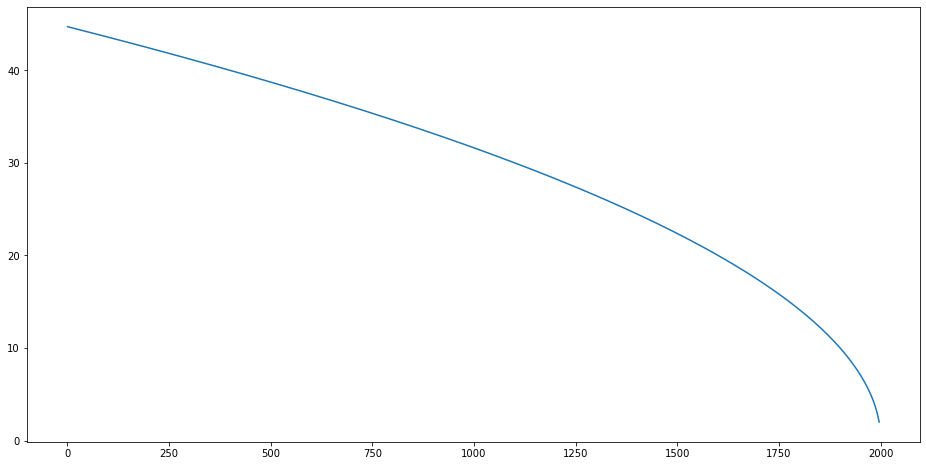

In [107]:
plt.figure()
plt.plot(r_val, err)
#Error decreases as r increases.

# Exercise 1.2

In [148]:
#Image already loaded

#econ SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

In [149]:
def err_SVD(r):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    err = np.linalg.norm(X - Xapprox, 'fro')/ np.linalg.norm(X, 'fro')
    var = err*err
    return(err, var)

In [150]:
err, var = err_SVD(5)
print(err)
print(var)

0.16174575174889805
0.026161688208816154


In [155]:
Err = []
Var = []
Cumsum = []
r_val = []


for i in range(1, 1500, 5):
    err, var = err_SVD(i)
    Err.append(1-err)
    Var.append(1-var)
    Cumsum.append(np.cumsum(np.diag(S))[i-1]/np.sum(np.diag(S)))
    r_val.append(i)


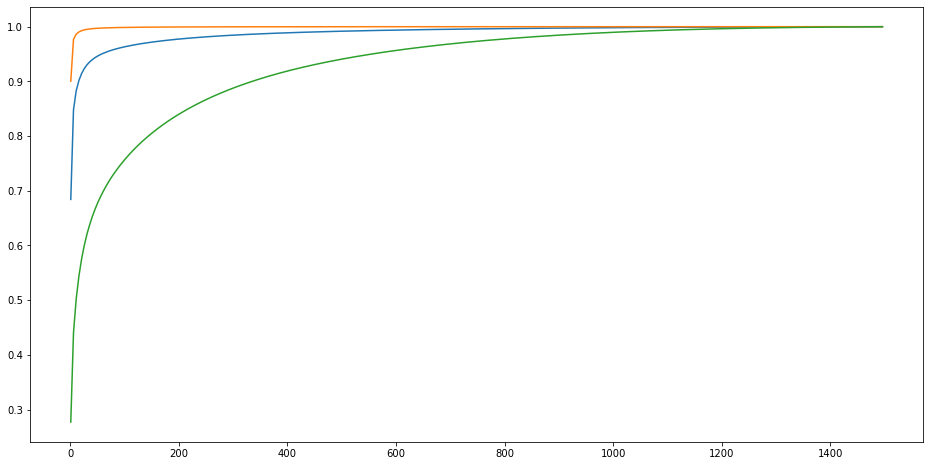

In [156]:
plt.plot(r_val, Err)
plt.plot(r_val, Var)
plt.plot(r_val, Cumsum)

In [162]:
result = next(k for k, value in enumerate(Err)
              if value > 0.99)
print("99% > index for Error is",r_val[result])

99% > index for Error is 436


In [163]:
result = next(k for k, value in enumerate(Var)
              if value > 0.99)
print("99% > index for Variance is",r_val[result])

99% > index for Variance is 16


In [164]:
result = next(k for k, value in enumerate(Cumsum)
              if value > 0.99)
print("99% > index for Cumsum is: ",r_val[result])

99% > index for Cumsum is:  1006
